In [1]:
### Auto reloading moduls
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from helpFunctions import *
from generateGLV import *
from fitGLV import *
from mpl_toolkits.mplot3d import Axes3D
import time

In [3]:
%matplotlib notebook

----
Make a 3D plot of the with: x = log noise, y = log interaction


In [7]:
expoNoise = np.arange(-5,-0,0.5)
noises = np.power(10,expoNoise)
expoInteraction = np.arange(-4.5,0.5,0.5)
interactions = np.power(10,expoInteraction)
pertubations = np.array([10000,20,2])
subSampleSteps = np.array([1,2,3,4,5,7,9,11,13,15,20,25,30,35,40,60,80,100,120,140])
numberConfig = len(noises)*len(interactions)*len(pertubations)
shape = (len(pertubations),len(noises),len(interactions),len(subSampleSteps))

<IPython.core.display.Javascript object>


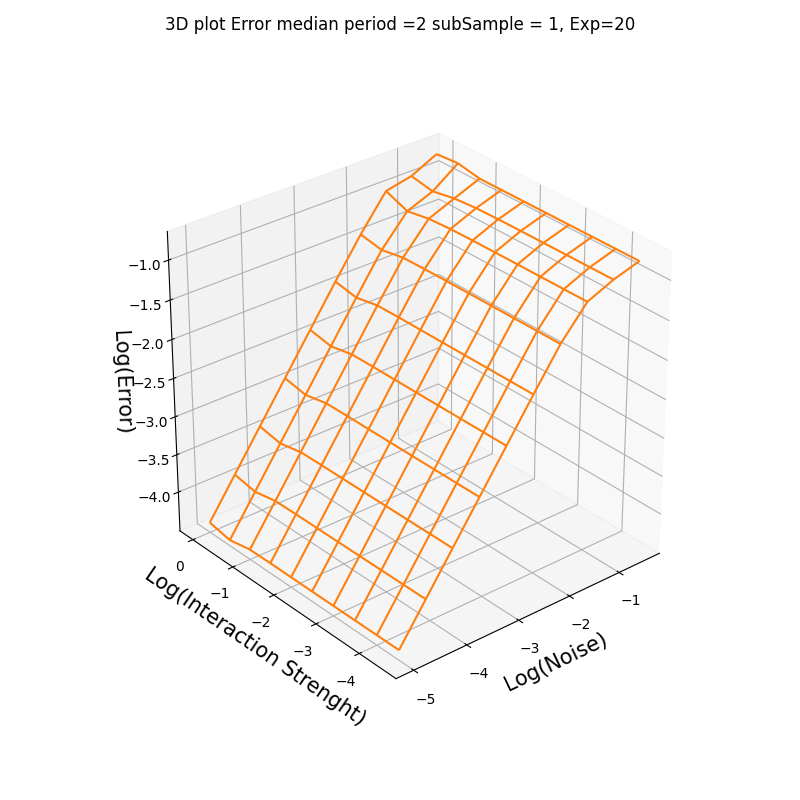

Text(0.5, 0, 'Log(Error)')

In [97]:
subSample = 1
indexPeriod = 2 # 0=10000, 1=20, 2=2
expNumb = 20

indexSample = np.where(subSampleSteps==subSample)[0][0]
medianError = np.zeros(shape=(len(expoNoise),len(expoInteraction)))
medianStd = np.zeros(shape=(len(expoNoise),len(expoInteraction)))

for i, n in enumerate(expoNoise):
    for j, Int in enumerate(expoInteraction):
        trueMat = np.load(f"DataStorage/FixedCode/trueMat{indexPeriod}{i}{j}.npy")
        BEst = np.load(f"DataStorage/FixedCode/BEst/BEst{indexPeriod}{i}{j}{indexSample}.npy")
        varBEst = np.load(f"DataStorage/FixedCode/varBEst/varBEst{indexPeriod}{i}{j}{indexSample}.npy")
        
        absError = np.abs(trueMat - BEst)[expNumb]
        absError_Interaction = offDiagonalGLVBEst(absError)
        
        medianError[i,j] = np.median(absError_Interaction)
        medianStd[i,j] = np.median(np.sqrt(varBEst[expNumb]))

fig = plt.figure(figsize=(8,8))
fig.suptitle(f"3D plot Error median period ={pertubations[indexPeriod]} subSample = {subSample}, Exp={expNumb}")
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(expoNoise,expoInteraction, indexing='ij')
#ax.plot_wireframe(X,Y,np.log10(medianError),label="MedianError",color="tab:blue")
ax.plot_wireframe(X,Y,np.log10(medianStd),label="MedianStd",color="tab:orange",alpha=1)

ax.view_init(azim=-130) # Immediatly set the good viewing angle. 

ax.set_xlabel("Log(Noise)",fontsize=15)
ax.set_ylabel("Log(Interaction Strenght)",fontsize=15)
ax.set_zlabel("Log(Error)", fontsize=15)